<a href="https://colab.research.google.com/github/guiSoaresCavalcante/analise-de-dados/blob/main/atividade01_classificacao_guilherme_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# Importando as libs necessárias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    confusion_matrix,
    classification_report,
    auc,
    accuracy_score,
    precision_score,
    recall_score,
)

In [31]:
# Carregando os dados
df = pd.read_csv('/content/titanic.csv')

### 1 - Leitura e tratamento de dados

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Verificando as médias, desvios padrões e distribuição dos dados

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Checando valores nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Acima percebemos que a coluna Cabin tem muitos valores nulos. A melhor opção seria removê-la

In [33]:
df = df.drop(columns=["Cabin"])

In [34]:
# Aplicando o label enconding
df["Sex"] = df["Sex"].replace({
    "male": 0,
    "female": 1
})

<ipython-input-34-3c4cfbf86167>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({


In [25]:
df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [35]:
# Aplicando o one hot enconding
embarked = pd.get_dummies(df["Embarked"], prefix = "embarked")
df = pd.concat([df, embarked], axis = 1)
df.drop(columns=["Embarked"], inplace=True)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


In [40]:
# Visualizando quantos valores diferentes existem na coluna 'Ticket'
len(df["Ticket"].unique())

681

Por conta da variedade de valores, também optarei por remover a coluna do dataset

In [41]:
df.drop(columns=["Ticket"], inplace=True)

Além das colunas acima, irei remover as colunas "Name" e "PassengerId", pois são irrelevantes para a nossa análise

In [59]:
df.drop(columns=["Name", "PassengerId"], inplace=True)

In [60]:
# Vendo como ficaram os dados
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


In [44]:
# Substituindo valores nulos com a média na coluna "Age"
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [45]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
embarked_C,0


### 2 - Visualização dos dados

Text(0, 0.5, 'Frequência')

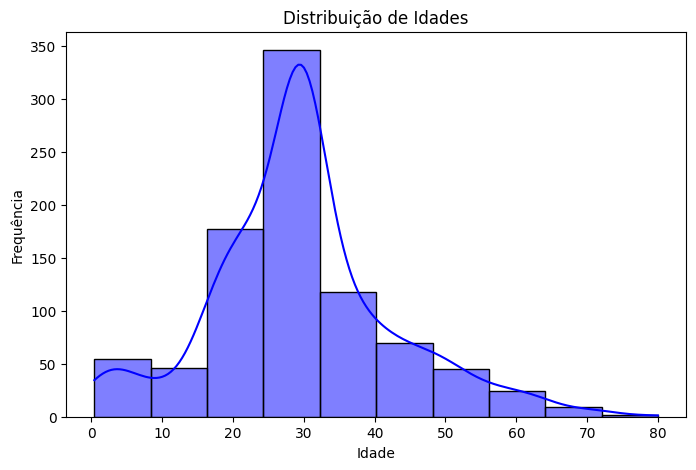

In [47]:
# Histograma para visualizar a distribuição das idades

plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=10, kde=True, color="blue")

plt.title("Distribuição de Idades")
plt.xlabel("Idade")
plt.ylabel("Frequência")

<ipython-input-56-eb31b04a4456>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Masculino", "Feminino"])


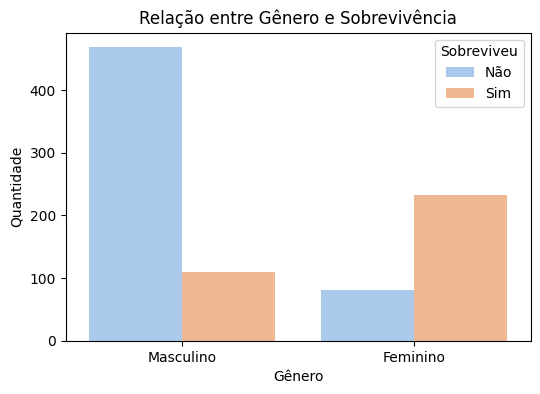

In [56]:
# Gráfico de barras com a relação entre gênero e sobrevivência

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Sex", hue="Survived", data=df, palette="pastel")

ax.set_xticklabels(["Masculino", "Feminino"])

plt.title("Relação entre Gênero e Sobrevivência")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.legend(title="Sobreviveu", labels=["Não", "Sim"])

plt.show()

<ipython-input-57-10de2fc5e186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Survived", y="Fare", data=df, palette="pastel")
<ipython-input-57-10de2fc5e186>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Masculino", "Feminino"])


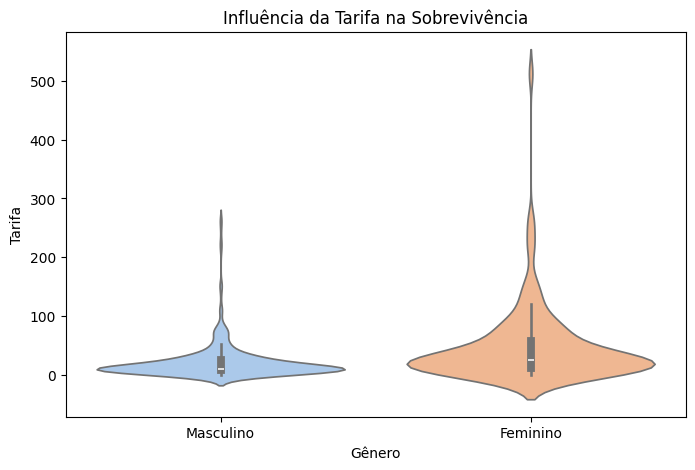

In [57]:
# Violin plot para verificar a influência da tarifa paga na sobrevivência

plt.figure(figsize=(8, 5))
ax = sns.violinplot(x="Survived", y="Fare", data=df, palette="pastel")

ax.set_xticklabels(["Masculino", "Feminino"])

plt.title("Influência da Tarifa na Sobrevivência")
plt.xlabel("Gênero")
plt.ylabel("Tarifa")

plt.show()

### 3 - Tratamento e Seleção de Dados para Classificação

In [61]:
# Selecionar atributosrelevantes para a classificação (evitando características/colunas que não contribuem para a previsão)

# Esse passo já foi feito no item 1, portando não serão removidas mais colunas

X = df.drop(columns=["Survived"])
y = df["Survived"]

In [66]:
# Dividir os dados em conjuntos de treino (70%) e teste (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
deeps = [3, 5, 7, 10, 15, 20]
criterions = ["gini", "entropy"]

********** Deep 3 | Criterion gini ************

Accuracy: 0.8097, Precision: 0.8125, Recall: 0.7027, F1-Score: 0.7536, AUC: 0.8203

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



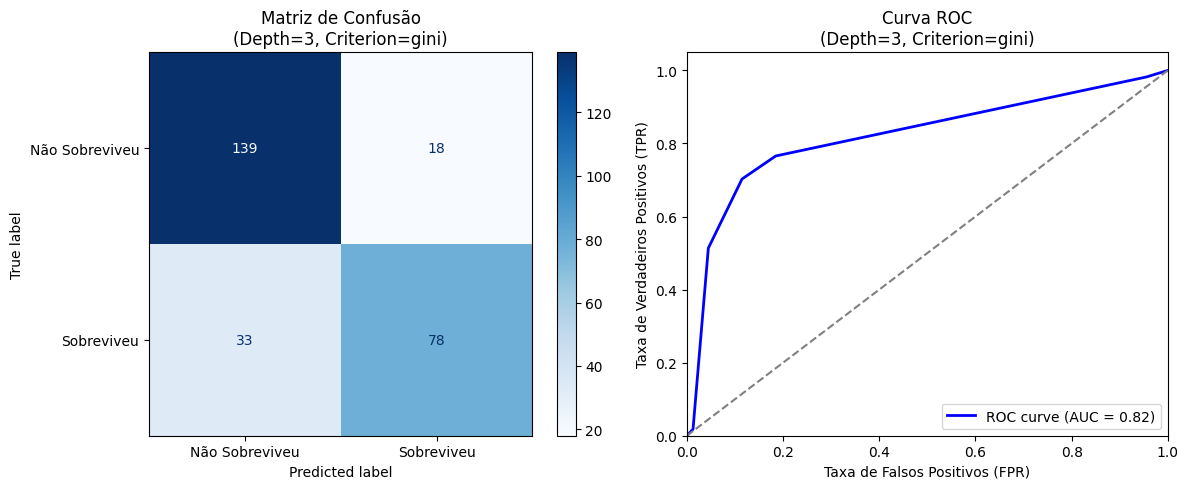







********** Deep 3 | Criterion entropy ************

Accuracy: 0.8097, Precision: 0.8125, Recall: 0.7027, F1-Score: 0.7536, AUC: 0.8553

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



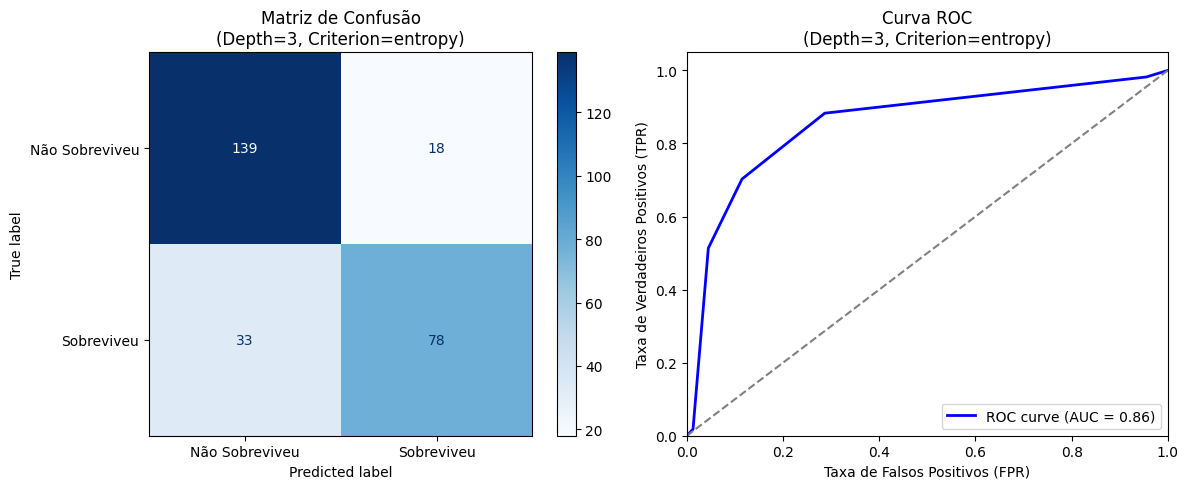







********** Deep 5 | Criterion gini ************

Accuracy: 0.7910, Precision: 0.7619, Recall: 0.7207, F1-Score: 0.7407, AUC: 0.8159

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       157
           1       0.76      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



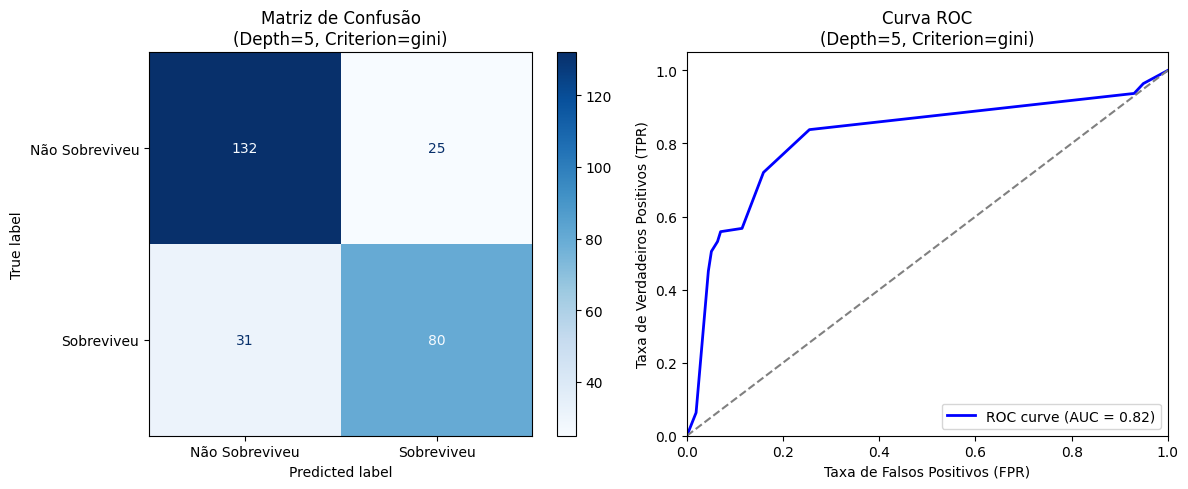







********** Deep 5 | Criterion entropy ************

Accuracy: 0.8022, Precision: 0.8152, Recall: 0.6757, F1-Score: 0.7389, AUC: 0.8433

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.74       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



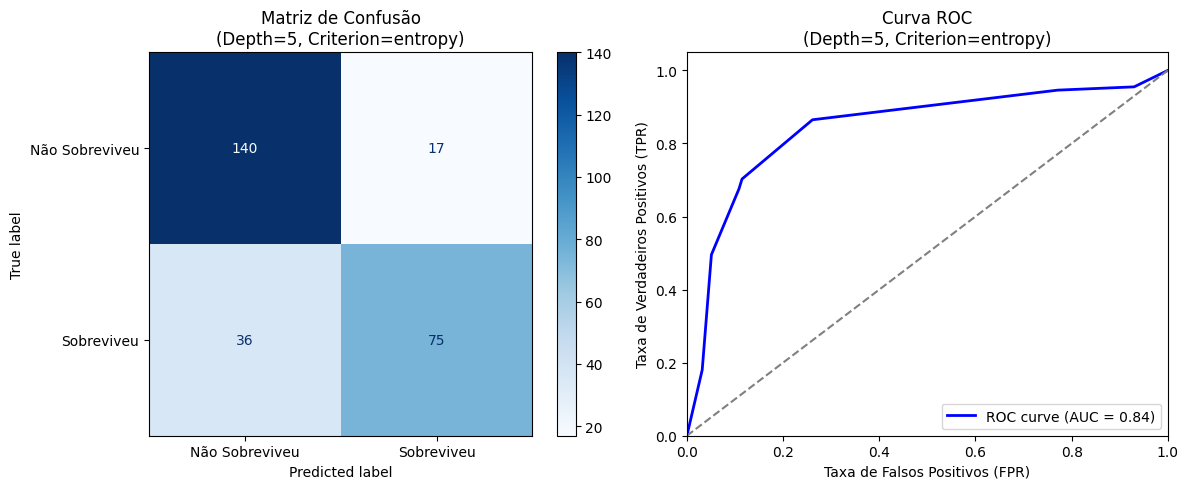







********** Deep 7 | Criterion gini ************

Accuracy: 0.7687, Precision: 0.8101, Recall: 0.5766, F1-Score: 0.6737, AUC: 0.7900

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       157
           1       0.81      0.58      0.67       111

    accuracy                           0.77       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.77      0.76       268



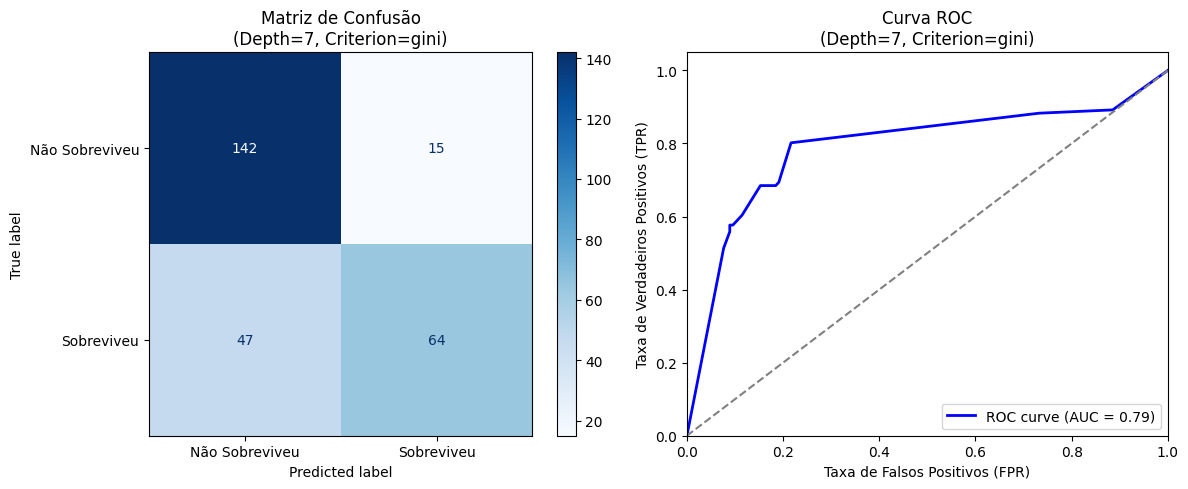







********** Deep 7 | Criterion entropy ************

Accuracy: 0.7687, Precision: 0.8101, Recall: 0.5766, F1-Score: 0.6737, AUC: 0.8182

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       157
           1       0.81      0.58      0.67       111

    accuracy                           0.77       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.77      0.76       268



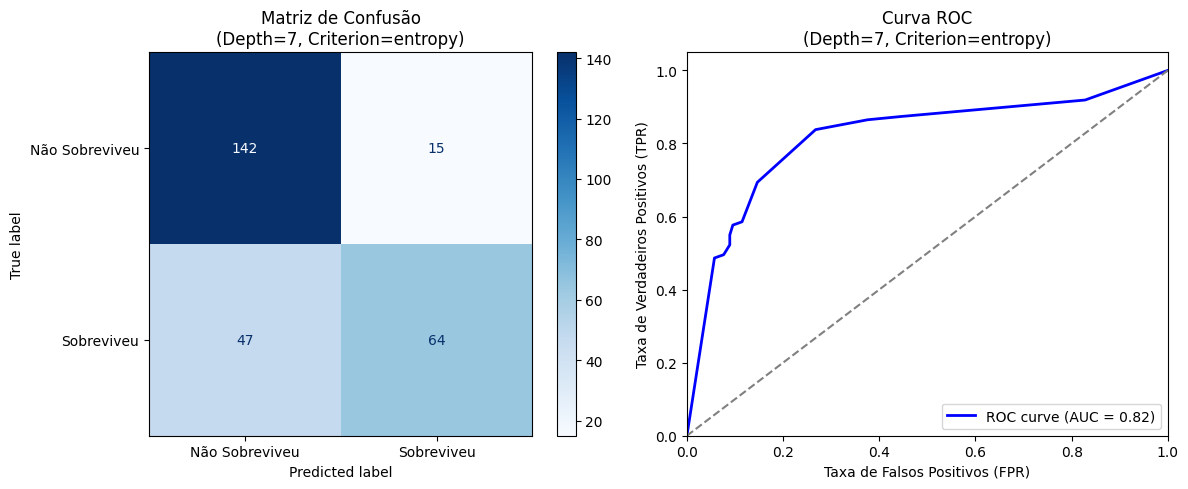







********** Deep 10 | Criterion gini ************

Accuracy: 0.7575, Precision: 0.7396, Recall: 0.6396, F1-Score: 0.6860, AUC: 0.7184

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       157
           1       0.74      0.64      0.69       111

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.75       268



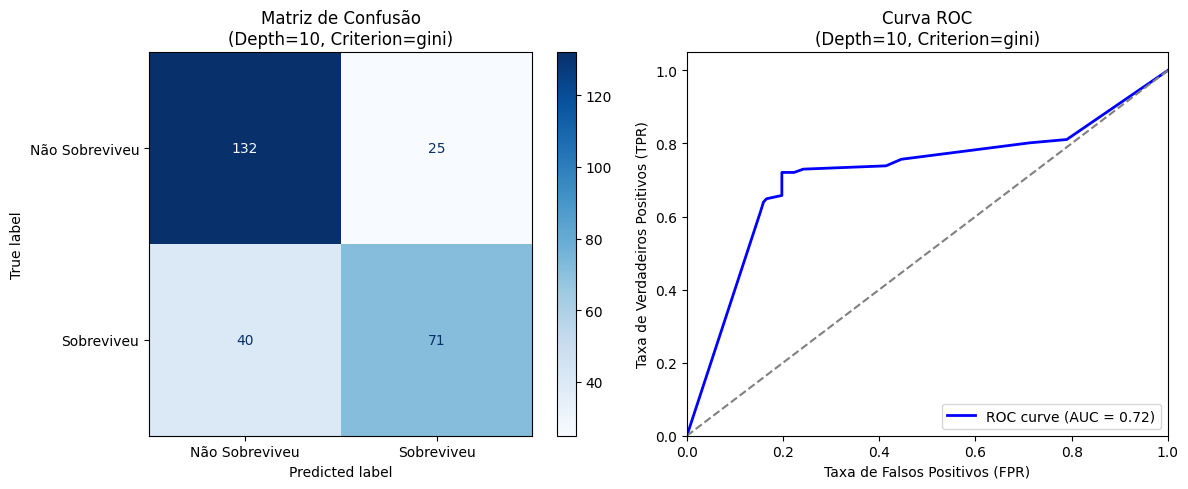







********** Deep 10 | Criterion entropy ************

Accuracy: 0.8097, Precision: 0.8409, Recall: 0.6667, F1-Score: 0.7437, AUC: 0.7769

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.67      0.74       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



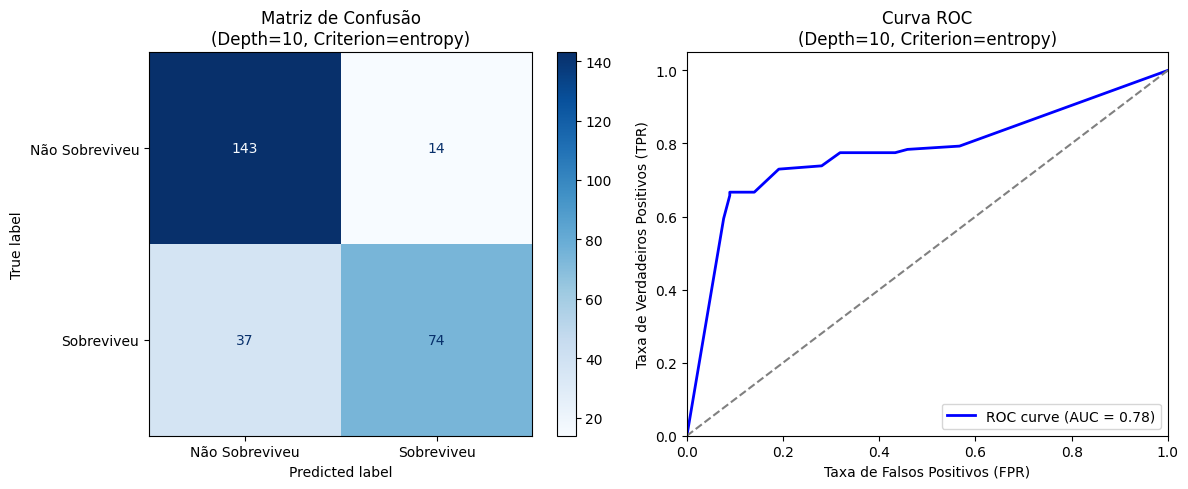







********** Deep 15 | Criterion gini ************

Accuracy: 0.7500, Precision: 0.6964, Recall: 0.7027, F1-Score: 0.6996, AUC: 0.7392

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       157
           1       0.70      0.70      0.70       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



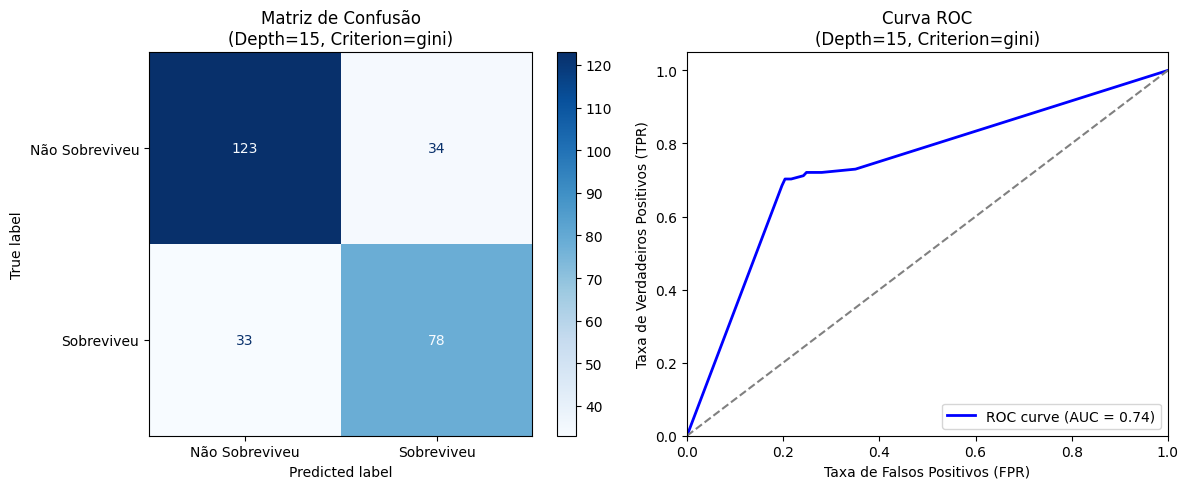







********** Deep 15 | Criterion entropy ************

Accuracy: 0.7724, Precision: 0.7604, Recall: 0.6577, F1-Score: 0.7053, AUC: 0.7521

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       157
           1       0.76      0.66      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



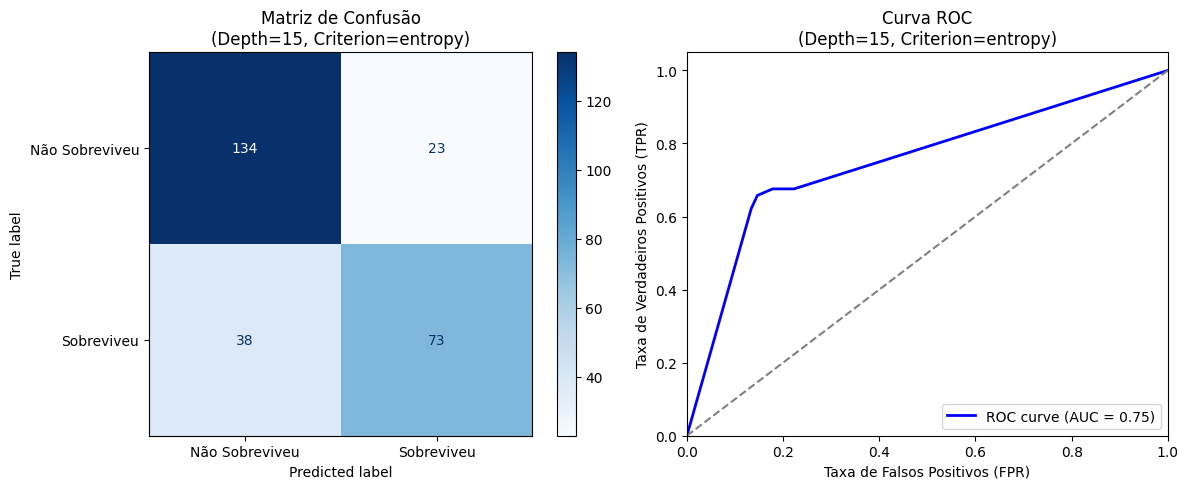







********** Deep 20 | Criterion gini ************

Accuracy: 0.7313, Precision: 0.6757, Recall: 0.6757, F1-Score: 0.6757, AUC: 0.7212

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       157
           1       0.68      0.68      0.68       111

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268



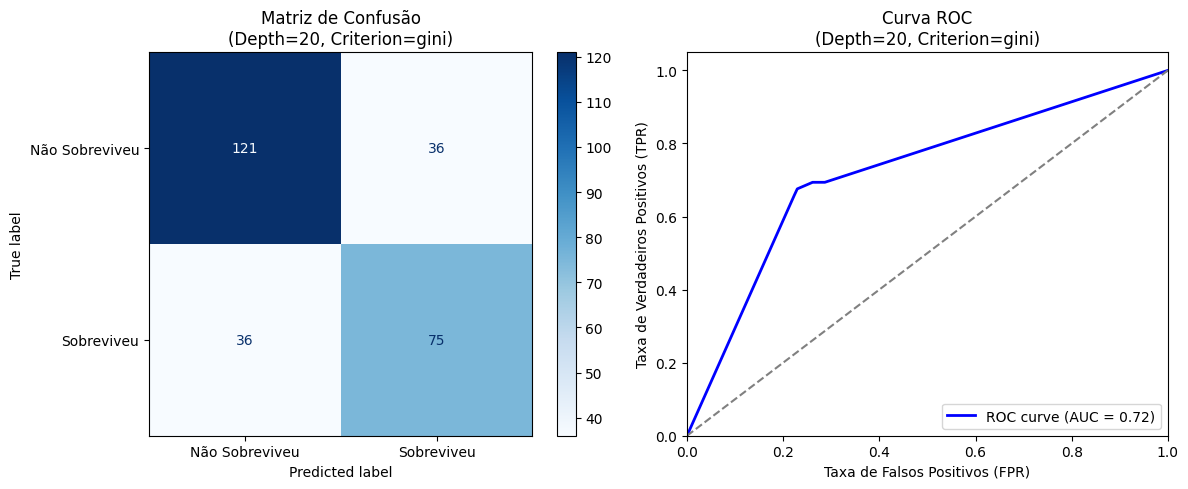







********** Deep 20 | Criterion entropy ************

Accuracy: 0.7724, Precision: 0.7500, Recall: 0.6757, F1-Score: 0.7109, AUC: 0.7574

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       157
           1       0.75      0.68      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



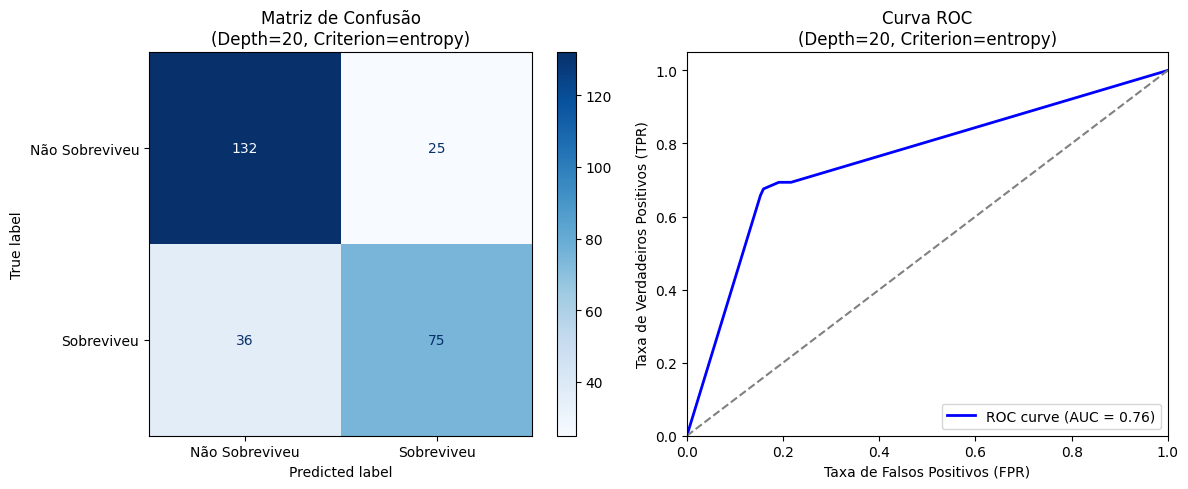

In [121]:
for deep in deeps:
    for criterion in criterions:
        clf = DecisionTreeClassifier(max_depth=deep, criterion=criterion)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)[:, 1]

        cm = confusion_matrix(y_test, y_pred)
        unique_labels = np.unique(y_test)

        # Avaliação:
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc_value = roc_auc_score(y_test, y_proba)
        conf_matrix = confusion_matrix(y_test, y_pred)

        print(f'********** Deep {deep} | Criterion {criterion} ************\n')
        print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}, AUC: {roc_auc_value:.4f}\n")
        print(classification_report(y_test, y_pred))

        label_map = {0: "Não Sobreviveu", 1: "Sobreviveu"}
        display_labels = [label_map[label] for label in unique_labels]

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
        disp.plot(ax=axes[0], values_format='d', cmap='Blues')
        axes[0].set_title(f"Matriz de Confusão\n(Depth={deep}, Criterion={criterion})")

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
        axes[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
        axes[1].set_title(f'Curva ROC\n(Depth={deep}, Criterion={criterion})')
        axes[1].legend(loc="lower right")

        plt.tight_layout()
        plt.show()
        print("\n\n\n\n\n")


### 4 - Avaliação das Classificações Obtidas

*Obs: As matrizes de confusão e as métricas de desempenho já foram mostradas acima*


##### Conclusão:

O modelo performou melhor com os parâmetros Deep = 10  e Criterion = entropy. Com os seguintes resultados:

Accuracy: 0.8097, Precision: 0.8409, Recall: 0.6667, F1-Score: 0.7437, AUC: 0.7769

O modelo apresentou 84% de acerto na previsão de sobreviventes.